##  Libraries Used
### Authors:
Team 4:
- Stephen Panev
- Marin St
- Dayana Hristova
- Dimitar Lyubchev

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret.classification import *

## Read the data and data prep
We are using the financial distress data of companies. This is part of a Kaggle dataset which can be viewed in the following link: https://www.kaggle.com/shebrahimi/financial-distress
The below analysis is a remake of the analysis by the last notebook, only this time it is produced by the new Python library PyCaret.PyCaret is a new library that is presented as using less code. (https://pycaret.org/) Due to this reason we will not be as much descriptive as the last notebook. The results will be compared to the resorts produced by sklearn.

In [49]:
data = pd.read_csv('data/Financial Distress.csv')

In [50]:
data.shape

(3672, 86)

In [51]:
data.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [53]:
data['Company'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [54]:
data['Time'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

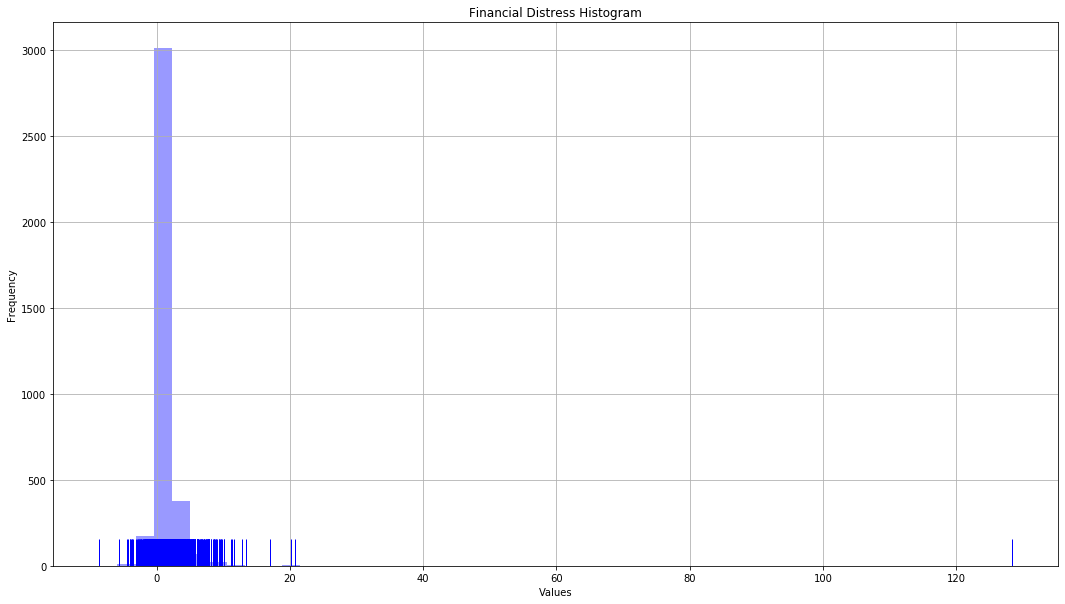

In [55]:
plt.figure(figsize=(18,10))
sns.distplot(data['Financial Distress'],kde=False, rug=True, color = 'blue');
plt.title('Financial Distress Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [56]:
data['Financial Distress'].describe()

count    3672.000000
mean        1.040257
std         2.652227
min        -8.631700
25%         0.172275
50%         0.583805
75%         1.351750
max       128.400000
Name: Financial Distress, dtype: float64

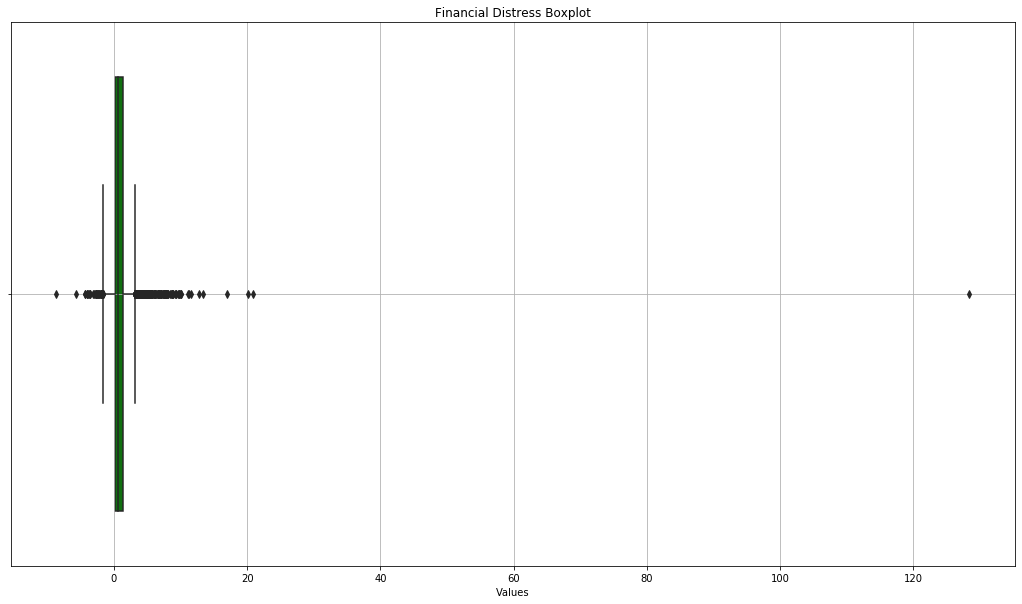

In [57]:
plt.figure(figsize=(18,10))
sns.boxplot(x=data['Financial Distress'], color = 'green')
plt.title('Financial Distress Boxplot')
plt.xlabel('Values')
plt.grid(True)
plt.show()

In [58]:
max(data['Financial Distress'])

128.4

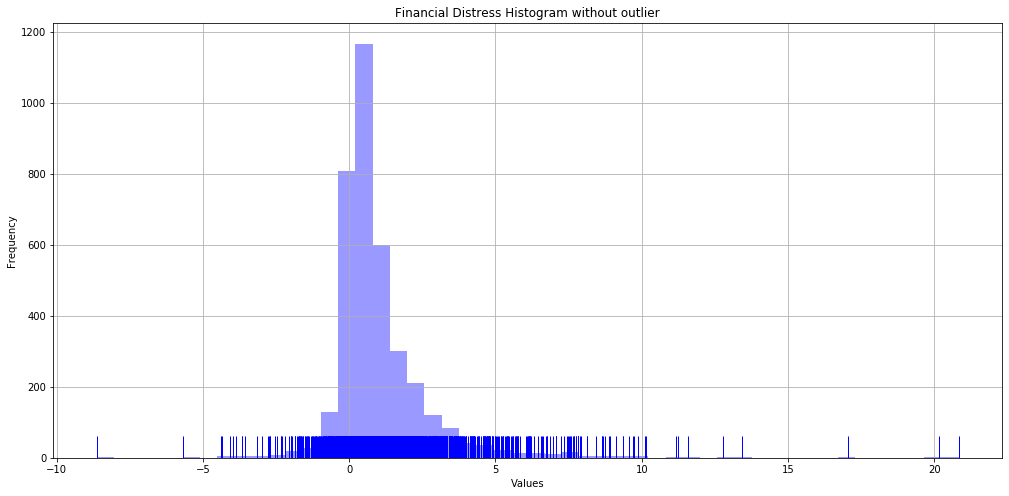

In [59]:
plt.figure(figsize=(17,8))
sns.distplot(data[data['Financial Distress'] < 100]['Financial Distress'], kde=False, rug=True, color = 'blue')
plt.title('Financial Distress Histogram without outlier')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [60]:
data_average = data.groupby("Company", as_index=False).mean() 
data_average = data_average.drop(['Time'], axis=1)
data_average.shape

(422, 85)

In [61]:
data_average.head()

,Company,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,-0.334323,1.179250,-0.011305,0.869128,0.940075,0.035843,0.126302,0.564090,-0.018738,...,92.050750,33.5625,32.486500,16.791750,15.750000,1.500000,22.0,-0.177584,31.5,50.5
1,2,1.966056,1.539892,0.204816,0.628511,0.931229,0.302304,0.251645,1.068073,0.218296,...,86.854643,92.1600,89.237286,17.770857,15.142857,-2.721429,29.0,1.895985,13.5,33.5
2,3,-1.659900,0.874400,-0.034676,0.793500,0.609520,-0.002632,-0.086847,0.506090,-0.056892,...,85.437000,27.0700,26.102000,16.000000,16.000000,0.200000,25.0,-0.303170,8.0,37.0
3,4,0.839656,1.553275,0.138410,0.462178,0.759583,0.185367,0.168315,0.472444,0.171318,...,86.854643,92.1600,89.237286,17.770857,15.142857,-2.721429,12.0,0.748936,34.5,50.5
4,5,1.969673,1.127500,0.107643,0.743549,0.449420,0.108686,0.089244,0.664047,0.249389,...,86.854643,92.1600,89.237286,17.770857,15.142857,-2.721429,23.0,1.921633,18.5,43.5


In [62]:
data_one_period = data.drop_duplicates(subset=['Company'], keep='last')

In [63]:
time_to_merge = pd.DataFrame(data_one_period[['Company','Time']])
time_to_merge.head()

,Company,Time
3,1,4
17,2,14
18,3,1
32,4,14
46,5,14


In [64]:
data_average_with_time = pd.merge(time_to_merge,data_average, on='Company')
data_average_with_time.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,4,-0.334323,1.179250,-0.011305,0.869128,0.940075,0.035843,0.126302,0.564090,...,92.050750,33.5625,32.486500,16.791750,15.750000,1.500000,22.0,-0.177584,31.5,50.5
1,2,14,1.966056,1.539892,0.204816,0.628511,0.931229,0.302304,0.251645,1.068073,...,86.854643,92.1600,89.237286,17.770857,15.142857,-2.721429,29.0,1.895985,13.5,33.5
2,3,1,-1.659900,0.874400,-0.034676,0.793500,0.609520,-0.002632,-0.086847,0.506090,...,85.437000,27.0700,26.102000,16.000000,16.000000,0.200000,25.0,-0.303170,8.0,37.0
3,4,14,0.839656,1.553275,0.138410,0.462178,0.759583,0.185367,0.168315,0.472444,...,86.854643,92.1600,89.237286,17.770857,15.142857,-2.721429,12.0,0.748936,34.5,50.5
4,5,14,1.969673,1.127500,0.107643,0.743549,0.449420,0.108686,0.089244,0.664047,...,86.854643,92.1600,89.237286,17.770857,15.142857,-2.721429,23.0,1.921633,18.5,43.5


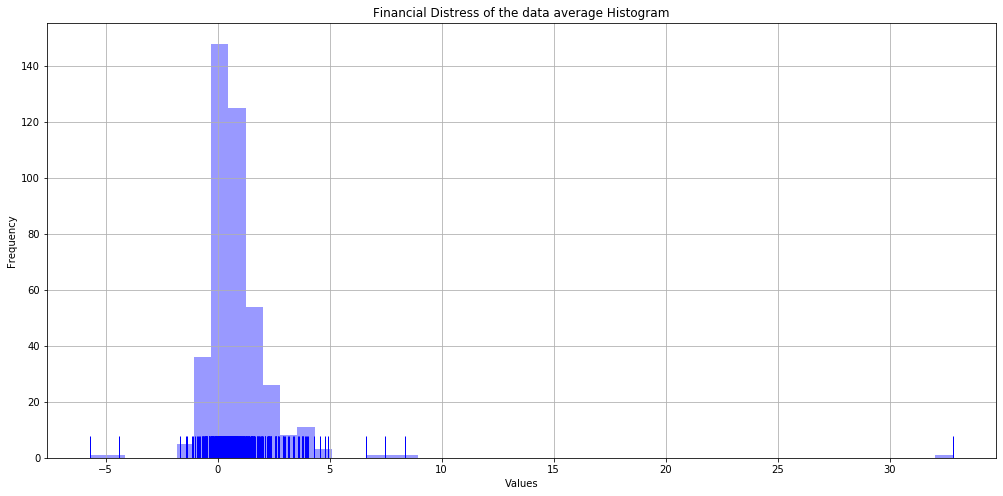

In [65]:
plt.figure(figsize=(17,8))
sns.distplot(data_average['Financial Distress'],kde=False, rug=True, color = 'blue')
plt.title('Financial Distress of the data average Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

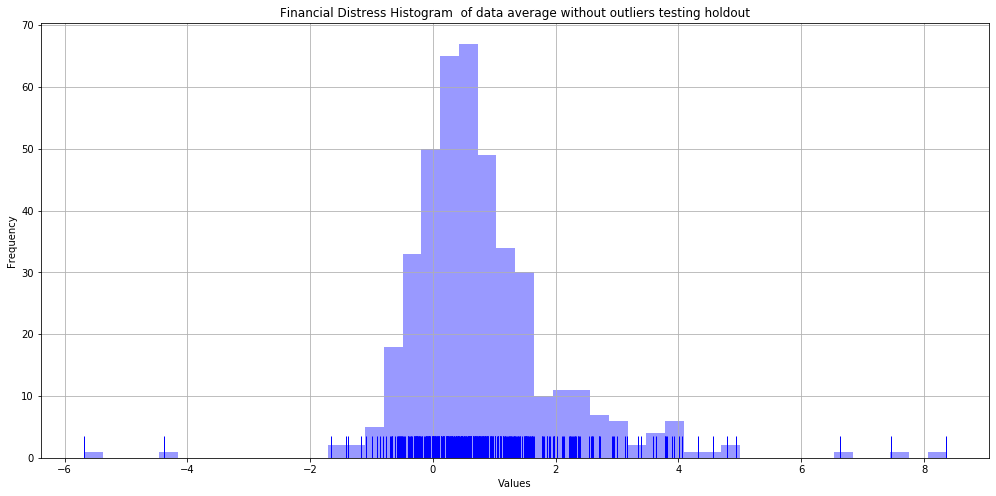

In [66]:
plt.figure(figsize=(17,8))
sns.distplot(data_average[data_average['Financial Distress'] < 10]['Financial Distress'],kde=False, rug=True, color = 'blue')
plt.title('Financial Distress Histogram  of data average without outliers testing holdout')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [67]:
pd.qcut(data_average['Financial Distress'], 3).value_counts()

(0.929, 32.813]                141
(-5.6850000000000005, 0.25]    141
(0.25, 0.929]                  140
Name: Financial Distress, dtype: int64

In [68]:
data_average['status'] = np.where(data_average['Financial Distress'] < 0.25,0,np.where(data_average['Financial Distress'] < 0.929, 1,2))

In [69]:
data_average = data_average.drop(['Financial Distress', 'Company'], axis=1)

In [71]:
data_average.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
0,1.179250,-0.011305,0.869128,0.940075,0.035843,0.126302,0.564090,-0.018738,-0.163632,-0.027849,...,33.5625,32.486500,16.791750,15.750000,1.500000,22.0,-0.177584,31.5,50.5,0
1,1.539892,0.204816,0.628511,0.931229,0.302304,0.251645,1.068073,0.218296,0.583685,0.238587,...,92.1600,89.237286,17.770857,15.142857,-2.721429,29.0,1.895985,13.5,33.5,2
2,0.874400,-0.034676,0.793500,0.609520,-0.002632,-0.086847,0.506090,-0.056892,-0.167930,-0.034521,...,27.0700,26.102000,16.000000,16.000000,0.200000,25.0,-0.303170,8.0,37.0,0
3,1.553275,0.138410,0.462178,0.759583,0.185367,0.168315,0.472444,0.171318,0.245349,0.195789,...,92.1600,89.237286,17.770857,15.142857,-2.721429,12.0,0.748936,34.5,50.5,1
4,1.127500,0.107643,0.743549,0.449420,0.108686,0.089244,0.664047,0.249389,0.443456,0.123553,...,92.1600,89.237286,17.770857,15.142857,-2.721429,23.0,1.921633,18.5,43.5,2


## Modeling
First we create a setup with the desired parameters. The report can be viewed below. The chosen methods are highlighted.

In [72]:
classification = setup(data_average, target = 'status', session_id = 42,normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.75, train_size = 0.7,
                       silent = False) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(422, 84)"
4,Missing Values,False
5,Numeric Features,83
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


We compare some of the models based on some indicators. AUC for multiple classification is not present. The highest results are highlighted.

In [73]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.847400,0.000000,0.846300,0.858700,0.845800,0.771000
1,Extreme Gradient Boosting,0.837100,0.000000,0.836700,0.858600,0.838100,0.755800
2,Gradient Boosting Classifier,0.837000,0.000000,0.836300,0.852100,0.838800,0.755600
3,Light Gradient Boosting Machine,0.836900,0.000000,0.837000,0.856100,0.838400,0.755700
4,CatBoost Classifier,0.833700,0.000000,0.833700,0.851200,0.834500,0.750600
5,Ada Boost Classifier,0.817200,0.000000,0.817800,0.841500,0.817700,0.726100
6,Extra Trees Classifier,0.810100,0.000000,0.809300,0.831200,0.809600,0.715000
7,Logistic Regression,0.793200,0.000000,0.793000,0.810300,0.786700,0.689900
8,SVM - Linear Kernel,0.773000,0.000000,0.772600,0.782100,0.770700,0.659600
9,Linear Discriminant Analysis,0.732400,0.000000,0.732600,0.748300,0.729400,0.598900


We take a deeper look at some of the models. There are 10 folds as a default. We can preview the mean and the standard deviation.

In [74]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8667,0.0,0.8667,0.8727,0.8682,0.8000
1,0.8000,0.0,0.8000,0.8000,0.7949,0.7000
2,0.9000,0.0,0.9000,0.9231,0.9019,0.8500
3,0.8333,0.0,0.8333,0.8357,0.8331,0.7500
4,0.8667,0.0,0.8667,0.8727,0.8682,0.8000
5,0.8966,0.0,0.8963,0.8959,0.8947,0.8446
6,0.8966,0.0,0.8926,0.8985,0.8960,0.8444
7,0.8276,0.0,0.8333,0.8387,0.8198,0.7425
8,0.7241,0.0,0.7222,0.7649,0.7329,0.5872
9,0.8621,0.0,0.8519,0.8851,0.8486,0.7914


In [75]:
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.8000,0.8308,0.8020,0.7000
1,0.8000,0.0,0.8000,0.8141,0.7989,0.7000
2,0.9000,0.0,0.9000,0.9231,0.9019,0.8500
3,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
4,0.8333,0.0,0.8333,0.8320,0.8313,0.7500
5,0.8276,0.0,0.8259,0.8305,0.8231,0.7411
6,0.8621,0.0,0.8593,0.8750,0.8644,0.7925
7,0.7931,0.0,0.8000,0.8759,0.7893,0.6926
8,0.7931,0.0,0.7926,0.8096,0.7958,0.6904
9,0.8621,0.0,0.8556,0.8637,0.8566,0.7921


The evaluate function lets us view some of the results of the model after it has been tuned in the above code. Not all of the results are active in this instance.

In [76]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [77]:
gb = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.0,0.8333,0.8500,0.8357,0.7500
1,0.8333,0.0,0.8333,0.8424,0.8364,0.7500
2,0.8667,0.0,0.8667,0.9048,0.8704,0.8000
3,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
4,0.8667,0.0,0.8667,0.8667,0.8667,0.8000
5,0.8276,0.0,0.8259,0.8300,0.8273,0.7411
6,0.8621,0.0,0.8593,0.8750,0.8644,0.7925
7,0.8621,0.0,0.8630,0.8723,0.8613,0.7936
8,0.7241,0.0,0.7259,0.7706,0.7339,0.5887
9,0.8276,0.0,0.8222,0.8303,0.8239,0.7401


In [78]:
tuned_gb = tune_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7333,0.0,0.7333,0.7718,0.7397,0.6000
1,0.7333,0.0,0.7333,0.7235,0.7249,0.6000
2,0.9333,0.0,0.9333,0.9444,0.9346,0.9000
3,0.8333,0.0,0.8333,0.8500,0.8357,0.7500
4,0.8667,0.0,0.8667,0.8667,0.8667,0.8000
5,0.7931,0.0,0.7963,0.8292,0.7890,0.6904
6,0.9310,0.0,0.9296,0.9310,0.9310,0.8964
7,0.8621,0.0,0.8667,0.9045,0.8646,0.7943
8,0.7586,0.0,0.7593,0.7893,0.7655,0.6394
9,0.7931,0.0,0.7852,0.7994,0.7846,0.6876


In [79]:
evaluate_model(tuned_gb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [80]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6333,0.0,0.6333,0.7208,0.6212,0.4500
1,0.7000,0.0,0.7000,0.7175,0.6985,0.5500
2,0.7667,0.0,0.7667,0.8380,0.7593,0.6500
3,0.7667,0.0,0.7667,0.7685,0.7640,0.6500
4,0.8000,0.0,0.8000,0.8214,0.7963,0.7000
5,0.7586,0.0,0.7630,0.7931,0.7618,0.6394
6,0.7241,0.0,0.7185,0.7685,0.7214,0.5827
7,0.7931,0.0,0.7926,0.8022,0.7846,0.6893
8,0.7241,0.0,0.7222,0.7440,0.7307,0.5872
9,0.6207,0.0,0.6185,0.6552,0.6046,0.4304


We will trying bagging. boosting and blending of decision trees. You can read more on the topic https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9

In [81]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
1,0.8333,0.0,0.8333,0.8424,0.8364,0.7500
2,0.9333,0.0,0.9333,0.9444,0.9346,0.9000
3,0.8333,0.0,0.8333,0.8357,0.8331,0.7500
4,0.8667,0.0,0.8667,0.8694,0.8623,0.8000
5,0.8621,0.0,0.8630,0.8859,0.8597,0.7929
6,0.8621,0.0,0.8630,0.8621,0.8621,0.7929
7,0.7241,0.0,0.7296,0.7189,0.7044,0.5879
8,0.7586,0.0,0.7593,0.7893,0.7655,0.6394
9,0.7931,0.0,0.7852,0.7994,0.7846,0.6876


In [82]:
print(bagged_dt)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
                                              

In [83]:
boosted_dt = ensemble_model(dt, method = 'Boosting', n_estimators=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6333,0.0,0.6333,0.6899,0.6120,0.4500
1,0.7333,0.0,0.7333,0.7478,0.7302,0.6000
2,0.7667,0.0,0.7667,0.8380,0.7593,0.6500
3,0.8000,0.0,0.8000,0.8214,0.7963,0.7000
4,0.9000,0.0,0.9000,0.8993,0.8982,0.8500
5,0.7241,0.0,0.7296,0.7385,0.7224,0.5879
6,0.8276,0.0,0.8222,0.8632,0.8260,0.7397
7,0.6207,0.0,0.6185,0.6148,0.6166,0.4304
8,0.6897,0.0,0.6889,0.7124,0.6958,0.5356
9,0.6897,0.0,0.6889,0.7123,0.6814,0.5348


In [84]:
tuned_bagged_dt = tune_model('dt', ensemble=True, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8667,0.0,0.8667,0.8727,0.8682,0.8000
1,0.8333,0.0,0.8333,0.8320,0.8313,0.7500
2,0.8667,0.0,0.8667,0.9048,0.8704,0.8000
3,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
4,0.9000,0.0,0.9000,0.9061,0.9015,0.8500
5,0.8276,0.0,0.8296,0.8584,0.8198,0.7415
6,0.8621,0.0,0.8593,0.8750,0.8644,0.7925
7,0.8621,0.0,0.8667,0.9045,0.8574,0.7943
8,0.7586,0.0,0.7593,0.7893,0.7655,0.6394
9,0.8621,0.0,0.8556,0.8637,0.8566,0.7921


In [85]:
blend_soft = blend_models(method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7333,0.0,0.7333,0.7718,0.7397,0.6000
1,0.8667,0.0,0.8667,0.8727,0.8682,0.8000
2,0.8333,0.0,0.8333,0.8889,0.8375,0.7500
3,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
4,0.9000,0.0,0.9000,0.8993,0.8982,0.8500
5,0.8276,0.0,0.8259,0.8305,0.8231,0.7411
6,0.8621,0.0,0.8593,0.8750,0.8644,0.7925
7,0.8621,0.0,0.8667,0.8793,0.8609,0.7940
8,0.7586,0.0,0.7593,0.7893,0.7655,0.6394
9,0.8621,0.0,0.8556,0.8637,0.8566,0.7921


In [86]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7667,0.0,0.7667,0.7980,0.7709,0.6500
1,0.8333,0.0,0.8333,0.8426,0.8341,0.7500
2,0.9000,0.0,0.9000,0.9231,0.9019,0.8500
3,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
4,0.8667,0.0,0.8667,0.8667,0.8667,0.8000
5,0.7931,0.0,0.7963,0.8292,0.7890,0.6904
6,0.8621,0.0,0.8593,0.8750,0.8644,0.7925
7,0.8621,0.0,0.8667,0.8793,0.8609,0.7940
8,0.7586,0.0,0.7593,0.7893,0.7655,0.6394
9,0.8276,0.0,0.8222,0.8303,0.8239,0.7401


In [87]:
egb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.8000,0.8439,0.8052,0.7000
1,0.8333,0.0,0.8333,0.8426,0.8341,0.7500
2,0.8667,0.0,0.8667,0.9048,0.8704,0.8000
3,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
4,0.8667,0.0,0.8667,0.8667,0.8667,0.8000
5,0.7931,0.0,0.7926,0.8011,0.7924,0.6898
6,0.8621,0.0,0.8593,0.8750,0.8644,0.7925
7,0.8621,0.0,0.8667,0.9045,0.8574,0.7943
8,0.7586,0.0,0.7593,0.7893,0.7655,0.6394
9,0.8621,0.0,0.8556,0.8798,0.8573,0.7917


In [88]:
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.8000,0.8393,0.8056,0.7000
1,0.8667,0.0,0.8667,0.8727,0.8682,0.8000
2,0.8667,0.0,0.8667,0.9048,0.8704,0.8000
3,0.9000,0.0,0.9000,0.9061,0.9015,0.8500
4,0.8667,0.0,0.8667,0.8667,0.8667,0.8000
5,0.8621,0.0,0.8667,0.8879,0.8603,0.7940
6,0.8276,0.0,0.8259,0.8370,0.8308,0.7411
7,0.7931,0.0,0.7963,0.8128,0.7902,0.6909
8,0.7241,0.0,0.7259,0.7706,0.7339,0.5887
9,0.8621,0.0,0.8556,0.8637,0.8566,0.7921


In [89]:
tuned_lgb = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.8000,0.8308,0.8020,0.7000
1,0.8333,0.0,0.8333,0.8426,0.8341,0.7500
2,0.8667,0.0,0.8667,0.9048,0.8704,0.8000
3,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
4,0.8667,0.0,0.8667,0.8667,0.8667,0.8000
5,0.8276,0.0,0.8333,0.8597,0.8202,0.7425
6,0.8621,0.0,0.8593,0.8750,0.8644,0.7925
7,0.7931,0.0,0.7963,0.8314,0.7958,0.6915
8,0.7241,0.0,0.7259,0.7706,0.7339,0.5887
9,0.8276,0.0,0.8222,0.8303,0.8239,0.7401


Finally we blend several models with 2 different methods of voting soft and hard version. You can read more information of different methods of ensemble methods. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/.

In [90]:
blend_specific_soft = blend_models(estimator_list = [rf, egb, lgb, gb], method = 'soft')
# not catboost for the function

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.0,0.8333,0.8604,0.8379,0.7500
1,0.8667,0.0,0.8667,0.8727,0.8682,0.8000
2,0.8667,0.0,0.8667,0.9048,0.8704,0.8000
3,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
4,0.8667,0.0,0.8667,0.8667,0.8667,0.8000
5,0.8276,0.0,0.8296,0.8527,0.8278,0.7420
6,0.8621,0.0,0.8593,0.8750,0.8644,0.7925
7,0.8621,0.0,0.8667,0.8793,0.8609,0.7940
8,0.7241,0.0,0.7259,0.7706,0.7339,0.5887
9,0.8621,0.0,0.8556,0.8637,0.8566,0.7921


In [91]:
blend_specific_hard = blend_models(estimator_list = [rf,egb, lgb, gb], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.0,0.8333,0.8604,0.8379,0.7500
1,0.8333,0.0,0.8333,0.8426,0.8341,0.7500
2,0.8667,0.0,0.8667,0.9048,0.8704,0.8000
3,0.8667,0.0,0.8667,0.8788,0.8677,0.8000
4,0.8667,0.0,0.8667,0.8667,0.8667,0.8000
5,0.7931,0.0,0.7926,0.8011,0.7924,0.6898
6,0.8621,0.0,0.8593,0.8750,0.8644,0.7925
7,0.8966,0.0,0.9000,0.9224,0.8948,0.8455
8,0.7586,0.0,0.7593,0.7893,0.7655,0.6394
9,0.8621,0.0,0.8556,0.8637,0.8566,0.7921


We can preview the agreement and disagreement of the models in a plot, this is not present for every model.

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7333,0.0,0.7333,0.7607,0.7387,0.6000
1,0.8333,0.0,0.8333,0.8350,0.8329,0.7500
2,0.8667,0.0,0.8667,0.8674,0.8624,0.8000
3,0.8000,0.0,0.8000,0.8148,0.8038,0.7000
4,0.8333,0.0,0.8333,0.8485,0.8360,0.7500
5,0.7931,0.0,0.7963,0.8292,0.7890,0.6904
6,0.8621,0.0,0.8556,0.8695,0.8597,0.7921
7,0.6897,0.0,0.6926,0.6931,0.6749,0.5364
8,0.7586,0.0,0.7556,0.7686,0.7623,0.6381
9,0.7241,0.0,0.7222,0.7303,0.7260,0.5865


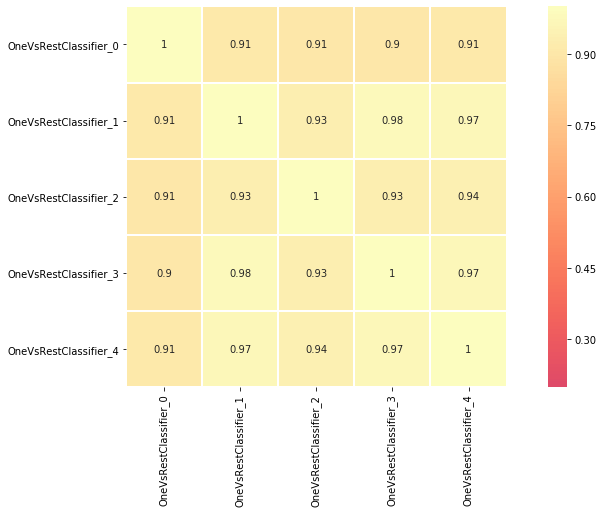

In [92]:
stack_soft = stack_models([rf,egb, lgb, gb, cb], plot=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7333,0.0,0.7333,0.7607,0.7387,0.6000
1,0.8333,0.0,0.8333,0.8350,0.8329,0.7500
2,0.8667,0.0,0.8667,0.8674,0.8624,0.8000
3,0.8000,0.0,0.8000,0.8148,0.8038,0.7000
4,0.8333,0.0,0.8333,0.8485,0.8360,0.7500
5,0.7931,0.0,0.7963,0.8292,0.7890,0.6904
6,0.8621,0.0,0.8556,0.8695,0.8597,0.7921
7,0.6897,0.0,0.6926,0.6931,0.6749,0.5364
8,0.7586,0.0,0.7556,0.7686,0.7623,0.6381
9,0.7241,0.0,0.7222,0.7303,0.7260,0.5865


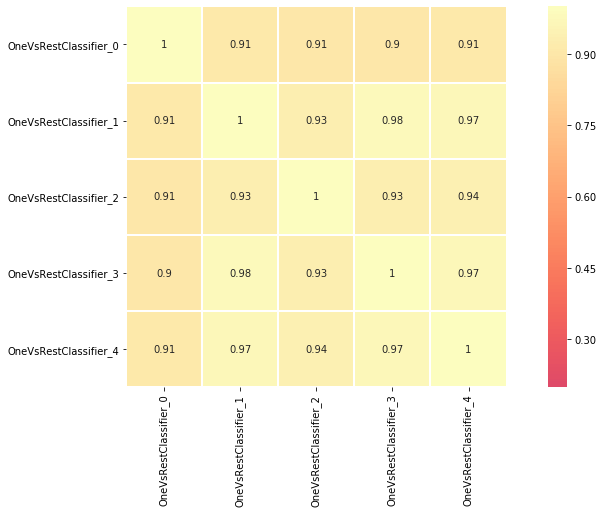

In [93]:
stack_hard = stack_models([rf,egb, lgb, gb, cb],  method='hard', plot=True)

## Test the models on a holdout sample
Finally we will test some of the models on the test sample. The predictions can be viewed below.

In [94]:
gb_holdout_pred = predict_model(gb)
gb_holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.7559,0,0.7551,0.757,0.7564,0.6339


,x4,x9,x11,x12,x15,x17,x18,x19,x22,x23,...,x72,x73,x74,x78,x80,x82,x83,status,Label,Score
0,-0.235880,-0.962146,0.303608,-0.186713,-0.273263,-0.207795,-1.845254,-0.005883,-0.449907,-1.406979,...,0.863079,1.862990,0.875683,0.662868,0.789812,0.713907,-0.025607,0,0,0.9896
1,0.294453,0.456432,0.500978,-0.186581,-0.270637,-0.205210,-0.285810,-0.050554,-0.068685,0.264763,...,0.113475,-0.111385,-0.150287,-0.180539,1.225575,-0.183361,-1.277243,2,1,0.9908
2,0.234019,1.956273,-1.621492,-0.186284,4.162752,-0.200972,-0.261811,-0.077996,-0.926736,0.901133,...,-0.256419,-0.544432,-0.065215,-0.246617,-0.672648,-0.376299,-1.666447,2,2,0.9869
3,0.232117,-1.710759,0.742225,-0.186687,-0.271420,-0.216866,-1.163790,-0.064286,-0.304550,-0.478708,...,1.421555,1.862951,0.552170,0.662770,-0.794697,0.663312,-0.062555,0,0,0.9968
4,-0.477883,-0.102368,-0.513372,-0.186612,-0.272248,-0.209478,-0.182208,-0.037135,-0.205190,0.026181,...,0.113475,-0.111385,-0.150287,-0.180539,1.225575,1.018293,0.804925,1,1,0.9850


In [95]:
lgb_holdout_pred = predict_model(lgb)
lgb_holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.7717,0,0.7709,0.7835,0.7752,0.6576


,x4,x9,x11,x12,x15,x17,x18,x19,x22,x23,...,x72,x73,x74,x78,x80,x82,x83,status,Label,Score
0,-0.235880,-0.962146,0.303608,-0.186713,-0.273263,-0.207795,-1.845254,-0.005883,-0.449907,-1.406979,...,0.863079,1.862990,0.875683,0.662868,0.789812,0.713907,-0.025607,0,0,0.9993
1,0.294453,0.456432,0.500978,-0.186581,-0.270637,-0.205210,-0.285810,-0.050554,-0.068685,0.264763,...,0.113475,-0.111385,-0.150287,-0.180539,1.225575,-0.183361,-1.277243,2,1,0.9900
2,0.234019,1.956273,-1.621492,-0.186284,4.162752,-0.200972,-0.261811,-0.077996,-0.926736,0.901133,...,-0.256419,-0.544432,-0.065215,-0.246617,-0.672648,-0.376299,-1.666447,2,2,0.9991
3,0.232117,-1.710759,0.742225,-0.186687,-0.271420,-0.216866,-1.163790,-0.064286,-0.304550,-0.478708,...,1.421555,1.862951,0.552170,0.662770,-0.794697,0.663312,-0.062555,0,0,0.9995
4,-0.477883,-0.102368,-0.513372,-0.186612,-0.272248,-0.209478,-0.182208,-0.037135,-0.205190,0.026181,...,0.113475,-0.111385,-0.150287,-0.180539,1.225575,1.018293,0.804925,1,1,0.9852


In [96]:
tuned_gb_holdout_pred = predict_model(tuned_gb)
tuned_gb_holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.8031,0,0.8021,0.801,0.8015,0.7046


,x4,x9,x11,x12,x15,x17,x18,x19,x22,x23,...,x72,x73,x74,x78,x80,x82,x83,status,Label,Score
0,-0.235880,-0.962146,0.303608,-0.186713,-0.273263,-0.207795,-1.845254,-0.005883,-0.449907,-1.406979,...,0.863079,1.862990,0.875683,0.662868,0.789812,0.713907,-0.025607,0,0,0.9974
1,0.294453,0.456432,0.500978,-0.186581,-0.270637,-0.205210,-0.285810,-0.050554,-0.068685,0.264763,...,0.113475,-0.111385,-0.150287,-0.180539,1.225575,-0.183361,-1.277243,2,1,1.0000
2,0.234019,1.956273,-1.621492,-0.186284,4.162752,-0.200972,-0.261811,-0.077996,-0.926736,0.901133,...,-0.256419,-0.544432,-0.065215,-0.246617,-0.672648,-0.376299,-1.666447,2,2,0.9940
3,0.232117,-1.710759,0.742225,-0.186687,-0.271420,-0.216866,-1.163790,-0.064286,-0.304550,-0.478708,...,1.421555,1.862951,0.552170,0.662770,-0.794697,0.663312,-0.062555,0,0,1.0000
4,-0.477883,-0.102368,-0.513372,-0.186612,-0.272248,-0.209478,-0.182208,-0.037135,-0.205190,0.026181,...,0.113475,-0.111385,-0.150287,-0.180539,1.225575,1.018293,0.804925,1,1,1.0000


In [97]:
rf_holdout_pred = predict_model(tuned_rf)
rf_holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.8031,0,0.8021,0.8016,0.7988,0.7045


,x4,x9,x11,x12,x15,x17,x18,x19,x22,x23,...,x72,x73,x74,x78,x80,x82,x83,status,Label,Score
0,-0.235880,-0.962146,0.303608,-0.186713,-0.273263,-0.207795,-1.845254,-0.005883,-0.449907,-1.406979,...,0.863079,1.862990,0.875683,0.662868,0.789812,0.713907,-0.025607,0,0,0.9315
1,0.294453,0.456432,0.500978,-0.186581,-0.270637,-0.205210,-0.285810,-0.050554,-0.068685,0.264763,...,0.113475,-0.111385,-0.150287,-0.180539,1.225575,-0.183361,-1.277243,2,1,0.7414
2,0.234019,1.956273,-1.621492,-0.186284,4.162752,-0.200972,-0.261811,-0.077996,-0.926736,0.901133,...,-0.256419,-0.544432,-0.065215,-0.246617,-0.672648,-0.376299,-1.666447,2,2,0.8973
3,0.232117,-1.710759,0.742225,-0.186687,-0.271420,-0.216866,-1.163790,-0.064286,-0.304550,-0.478708,...,1.421555,1.862951,0.552170,0.662770,-0.794697,0.663312,-0.062555,0,0,0.9752
4,-0.477883,-0.102368,-0.513372,-0.186612,-0.272248,-0.209478,-0.182208,-0.037135,-0.205190,0.026181,...,0.113475,-0.111385,-0.150287,-0.180539,1.225575,1.018293,0.804925,1,1,0.8137


## Conclusion 
The models produced by the PyCaret library have better results then similar models produces by sklearn. The differences between the training and testing scores are smaller.Some of the ensemble methods create better models other worsen the results. There instances that the test accuracy can be up to 15% higher using PyCaret. This discrepancy is suspicious and it needs to be investigated further. Due to the fact that sklearn is older and more widely used we will give it a higher faith for the results.
For further research on the topic there needs to be a greater investigation of the methods and documentation applied by PyCaret to find the reasons behind the stark differences.